# From dirty data (right after scraping)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Tag

In [31]:
import nbimporter

In [32]:
from scraper_data_reader import ReaderScrapedData
from constants import Constants

In [35]:
data = ReaderScrapedData.read_data(Constants.path_to_scraper_config, Constants.path_to_articles)

counter = 0
for website in data:
    counter += sum([len(data[website][dom]) for dom in data[website]])
print("Read {0} articles".format(counter))

Read 3150 articles


## Number of scraped tutorials per website

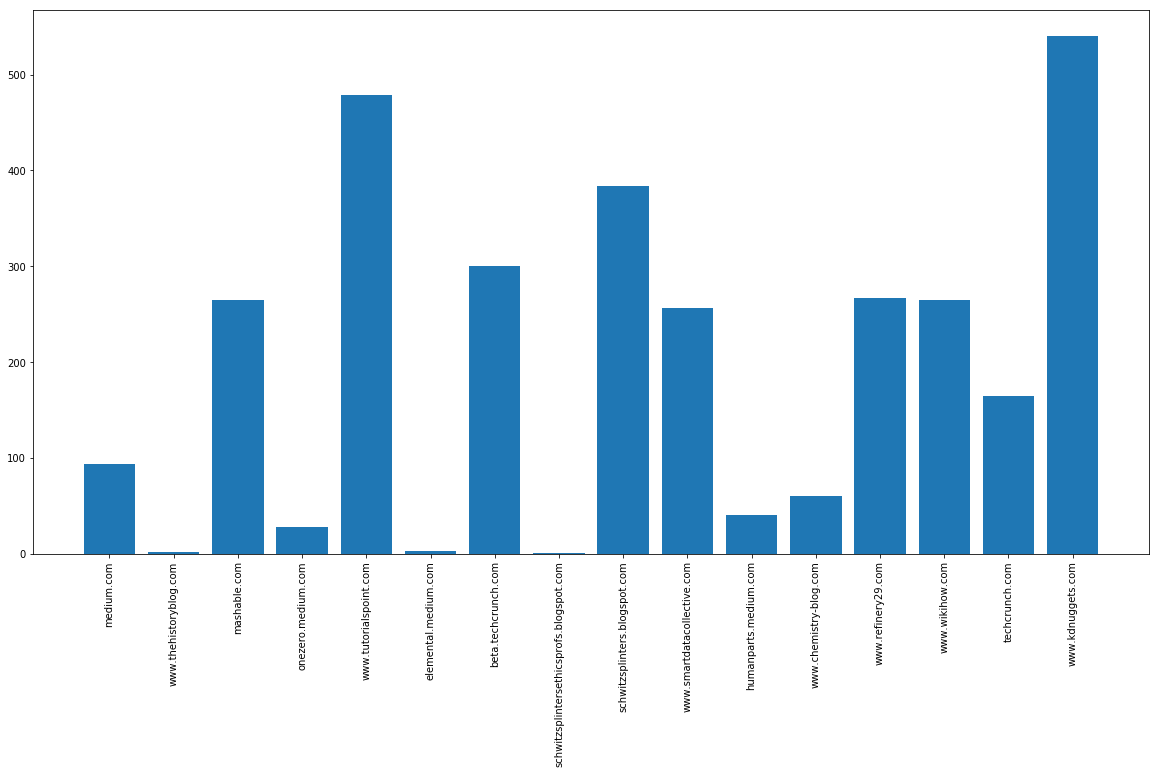

In [36]:
data_plt = {}
for k,v in data.items():
    for k2,v2 in v.items():
        data_plt[k2.split("/")[-1]] = len(v2)

fig = plt.figure(figsize=(20,10))
plt.bar(range(len(data_plt)), list(data_plt.values()), align='center')
plt.xticks(range(len(data_plt)), list(data_plt.keys()), rotation=90)

plt.show()

## Average lenght of html per website

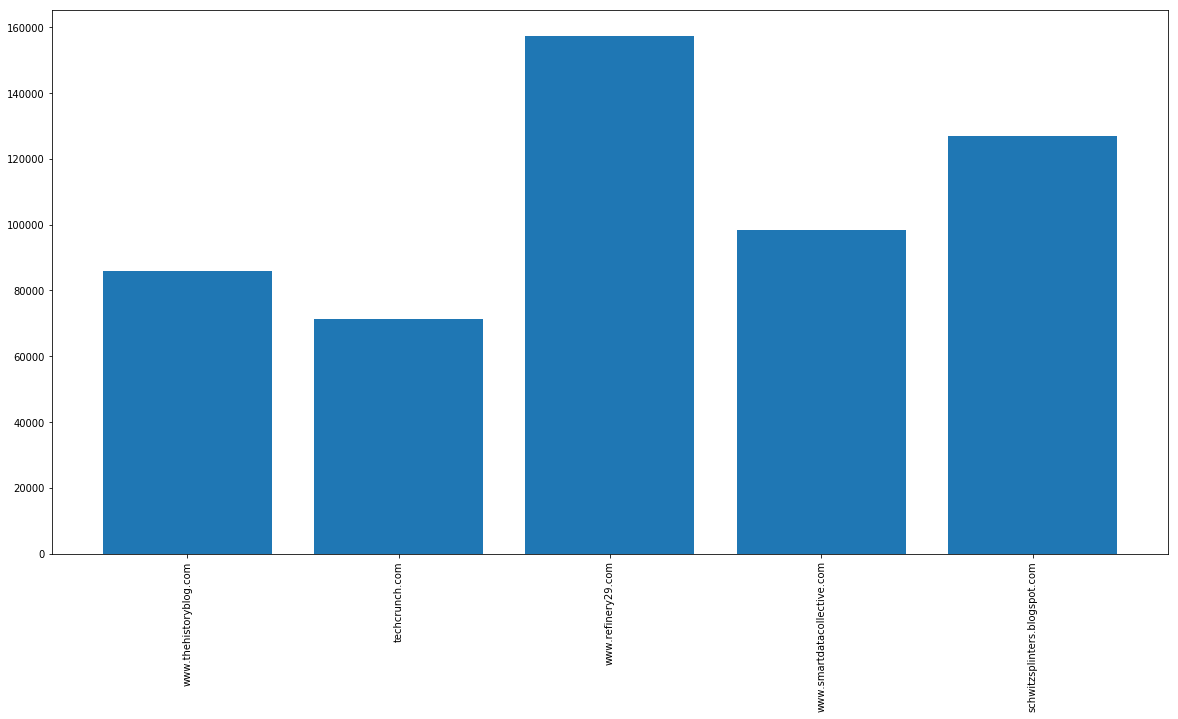

In [6]:
data_plt = {}
for k,v in data.items():
    for k2,v2 in v.items():
        data_plt[k2.split("/")[-1]] = sum([len(j["html"]) for j in v2]) / len(v2)

fig = plt.figure(figsize=(20,10))
plt.bar(range(len(data_plt)), list(data_plt.values()), align='center')
plt.xticks(range(len(data_plt)), list(data_plt.keys()), rotation=90)

plt.show()

## Average title length per website

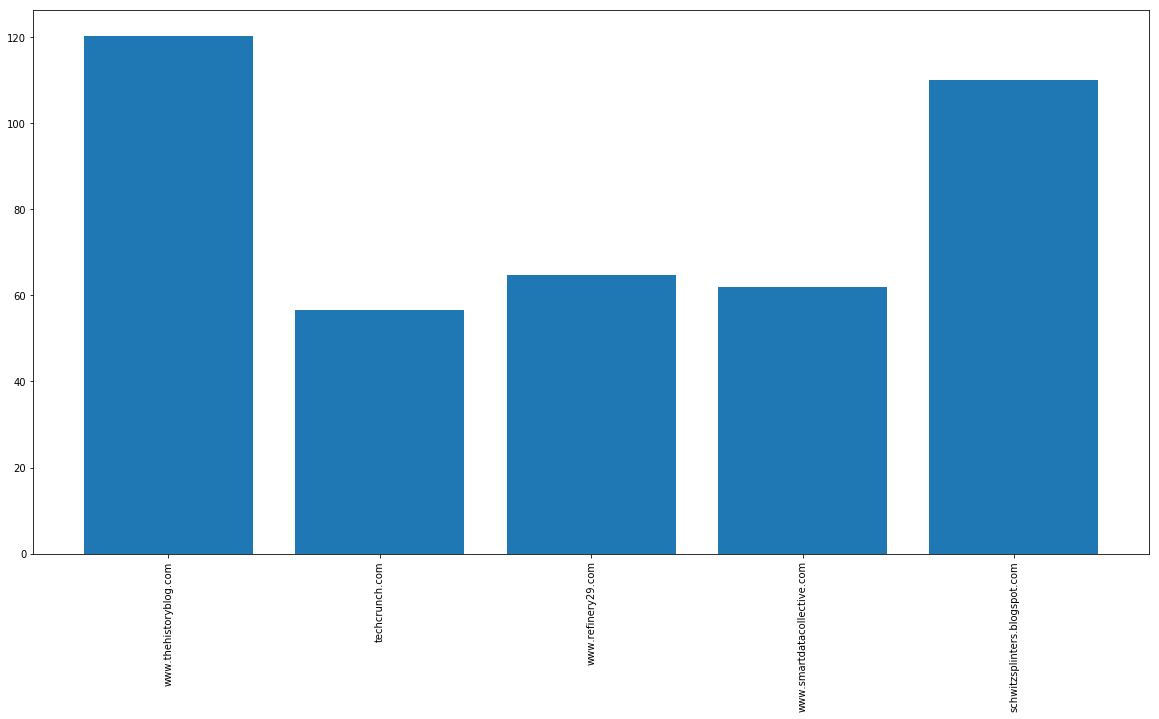

In [7]:
data_plt = {}
for k,v in data.items():
    for k2,v2 in v.items():
        data_plt[k2.split("/")[-1]] = sum([len(j["title"]) for j in v2]) / len(v2)

fig = plt.figure(figsize=(20,10))
plt.bar(range(len(data_plt)), list(data_plt.values()), align='center')
plt.xticks(range(len(data_plt)), list(data_plt.keys()), rotation=90)

plt.show()

### Average number of words in titles per website

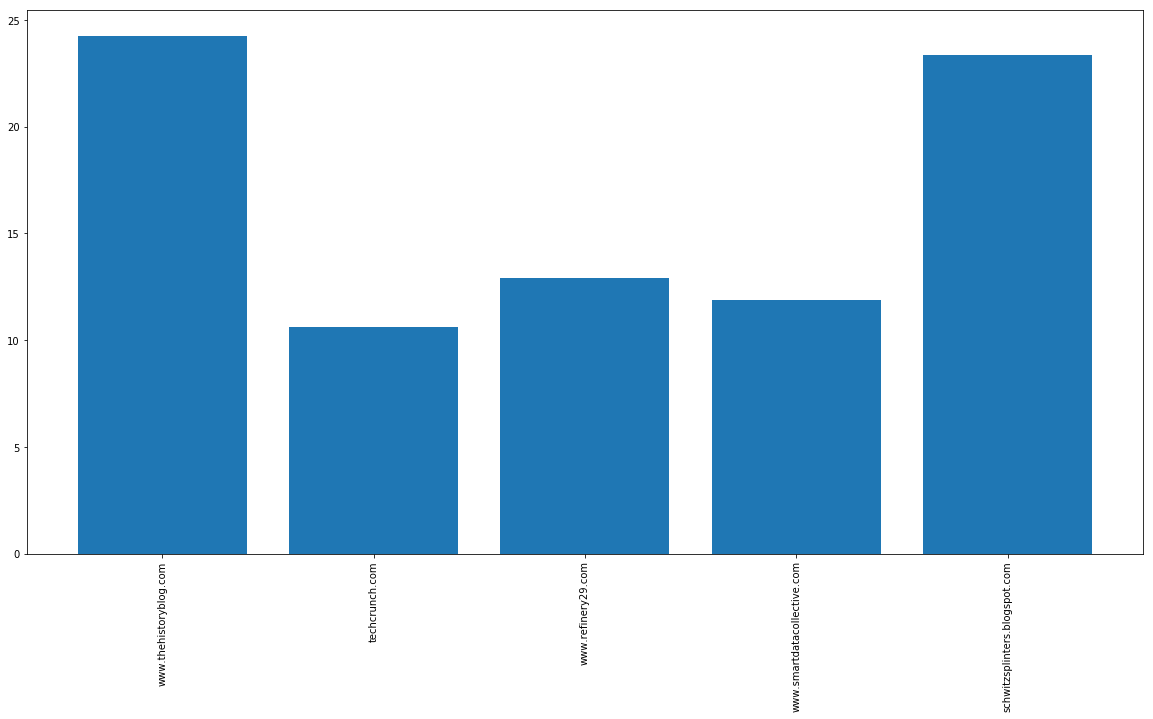

In [8]:
data_plt = {}
for k,v in data.items():
    for k2,v2 in v.items():
        data_plt[k2.split("/")[-1]] = sum([len(j["title"].split(" ")) for j in v2]) / len(v2)

fig = plt.figure(figsize=(20,10))
plt.bar(range(len(data_plt)), list(data_plt.values()), align='center')
plt.xticks(range(len(data_plt)), list(data_plt.keys()), rotation=90)

plt.show()

## Sample titles

In [9]:
import random

In [10]:
for k1,v1 in data.items():
    for k2,v2 in v1.items():
        random_selected = np.random.choice(v2, size=5, replace=True)
        titles_and_urls = [(el["title"], el["url"]) for el in random_selected]
        print(k2 + ":")
        for t,u in titles_and_urls:
            print(t + " --> " + u)
        print("---------")

techcrunch.com:
Nintendo and Sony temper console expectations ahead of E3   --> https://techcrunch.com/2019/04/26/nintendo-and-sony-temper-console-expectations-ahead-of-e3
Equity Shot: Uber’s IPO terms and Slack’s S-1   --> https://techcrunch.com/2019/04/26/equity-shot-ubers-ipo-terms-and-slacks-s-1
The FBI searched the offices of microbiome startup uBiome   --> https://techcrunch.com/2019/04/26/the-fbi-searched-the-offices-of-microbiome-startup-ubiome
The FBI searched the offices of microbiome startup uBiome   --> https://techcrunch.com/2019/04/26/the-fbi-searched-the-offices-of-microbiome-startup-ubiome
Daily Crunch: Facebook faces new privacy investigations   --> https://techcrunch.com/2019/04/26/daily-crunch-facebook-privacy
---------
www.smartdatacollective.com:
University Web Developer Programs Must Prep Students For Big Data Era   --> https://www.smartdatacollective.com/university-web-developer-programs-must-prep-students-for-big-data-era
3 Email Monitoring Software Tools Savvy 

## Sample contents

In [11]:
for k1,v1 in data.items():
    for k2,v2 in v1.items():
        random_selected = np.random.choice(v2, size=1, replace=True)
        titles_and_urls = [(el["content"], el["url"]) for el in random_selected]
        print(k2 + ":")
        for t,u in titles_and_urls:
            print(t + " --> " + u)
        print("---------")

techcrunch.com:
Sam Altman’s     little brother Jack is an entrepreneur, too.  Jack Altman,     whose resume includes a stint as vice president of business development at  Teespring,     has raised $15 million in Series B funding for his startup, Lattice, a modern approach to corporate goal setting. Shasta Ventures led the round, with participation from  Thrive Capital, Khosla Ventures and Y Combinator, the latter being the organization his brother led as president until  very recently  .   Lattice  , used by high-growth companies like Reddit, Slack, Coinbase and Glossier, helps human resources professionals develop insights about their teams. Founded in 2015, Altman and Eric Koslow, like most entrepreneurs, developed the idea for  Lattice     out of their own pain points.  “We realized that with quarterly goal settings, OKRs, we would write them up and get the leadership together and then they would sit on a shelf and nothing would happen,” Altman told TechCrunch.  Lattice, a SaaS bus

## Sample article HTML tag chains

In [12]:
for k1,v1 in data.items():
    for k2,v2 in v1.items():
        random_selected = np.random.choice(v2, size=5, replace=True)
        chtml_and_urls = [(el["content_html"], el["url"]) for el in random_selected]
        print(k2 + ":")
        for chtml,u in chtml_and_urls:
            soup = BeautifulSoup(chtml)
            chain = list(list(soup.select("body")[0].descendants)[0].descendants)
            chain_list = []
            for el in chain:
                if type(el) == Tag:
                    chain_list.append(el.name)
            print(" ".join(chain_list) + " ---> " + u)
        print("---------")

../articles/splinters/schwitzsplinters.blogspot.com:
p p a p blockquote p blockquote p a a a p p a p a p blockquote div ---> https://schwitzsplinters.blogspot.com/2006/05/is-conscious-experience-rich-or-thin.html
p a a p a a p b p blockquote p p p p i i i p a a a a blockquote p b i b i i a b p p p a a div ---> https://schwitzsplinters.blogspot.com/2013/03
p a a a br br br br br br br br br br br br div ---> https://schwitzsplinters.blogspot.com/2006/04
p a br br a strong a em br br br br em em br br blockquote br br br br br br em br br br br br br a del div ---> https://schwitzsplinters.blogspot.com/2010/05
p a a br br br br br div ---> http://schwitzsplinters.blogspot.com/search/label/Joshua%20Rust
---------
../articles/chemistry-blog/www.chemistry-blog.com:
p a script br a script br a p a img script p a p script div div ---> http://www.chemistry-blog.com/2016/12/03/the-underground-map-of-the-elements-now-with-nh-mc-ts-og
p p a img p a a p a a p p p a p p a p p p div div ---> http://